<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
Legume Tutorial: Shapes, Layers, and Photonic Crystals
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>January, 2025</font></center>

***

In [1]:
import numpy as np
import legume
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'


## Shapes and layers

Shapes and layers are the basic building blocks of a simulation in `legume`. A layer can contain any number of shapes. A layer is the fundamental object for the plane-wave expansion, while a photonic crystal made up of a number of layers is the fundamental object for the guided-mode expansion. Initializing a `ShapesLayer` class requires one positional argument `lattice`, which is an instance of the `Lattice` object. Let's start by creating a lattice, a layer, and some shapes.

In [4]:
# Initialize a lattice (can be 'square', 'hexagonal', or defined by primitive vectors)
lattice = legume.Lattice('hexagonal')

# Initialize a layer with background permittivity 2
layer = legume.ShapesLayer(lattice, eps_b=2) 

# Create a square and use the `add_shape` method to add it to the layer
square = legume.Square(eps=10, x_cent=0, y_cent=0, a=0.3)
layer.add_shape(square)

# Create a circle and also add it to the layer 
circle = legume.Circle(eps=6, x_cent=0.5, y_cent=0.3, r=0.2)
layer.add_shape(circle)


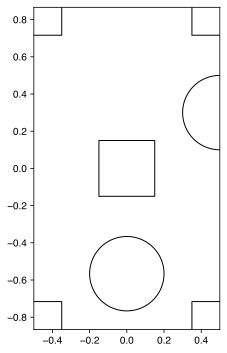

In [5]:
# Use an in-built visualization method to plot the contours of the shapes we have so far
legume.viz.shapes(layer)

Notice how the shapes are repeated in a `hexagonal` pattern, following the way we initialized our `lattice`. The above plot shows the shapes, but not the permittivity distribution. To see that, we can use another built-in method. 

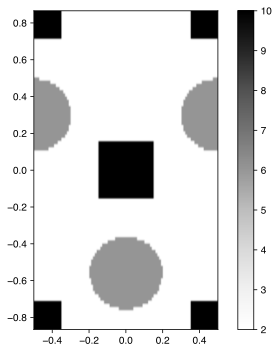

In [3]:
legume.viz.eps(layer, cbar=True)

## Plane-wave expansion
The layer we consturcted can now be used to initialize a plane-wave expansion simulation. This also takes two keyword arugments:

- `gmax`      : Maximum reciprocal lattice wave-vector length in units of $2\pi/a$
- `eps_eff`   : Effective background epsilon; if None, take layer.eps_b. Setting this to a different value can be useful for simulations of an effective slab of a given thickness and at a particular frequency.

In [11]:
pwe = legume.PlaneWaveExp(layer, gmax=6)

We can plot the permittivity as "seen" by the PWE with a given gmax; in other words, we can plot the real-space permittivity from the Fourier components that will be used in the expansion. Notice how this gets closer to the real structure as gmax increases.

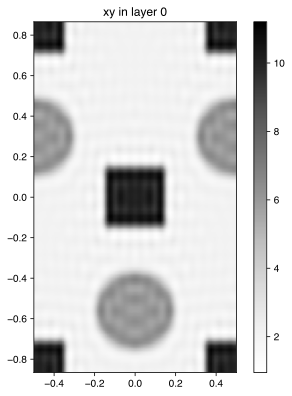

In [12]:
legume.viz.eps_ft(pwe)

We will not run the simulation here; this tutorial is only oriented towards building the simulation structures.

## Photonic crystals

We can build photonic crystals made of one or more layers, and add various shapes. Let's start with an example.

In [13]:
# Initialize a lattice (can be 'square', 'hexagonal', or defined by primitive vectors)
lattice = legume.Lattice('hexagonal')

# Initialize a PhC (optional kwargs are the permittivity in the lower and upper cladding)
phc = legume.PhotCryst(lattice, eps_l=1., eps_u=1.)

# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=10)

# We can add shapes to the layer in two different ways:

# Create a square and use the layer `add_shape` method
square = legume.Square(x_cent=0, y_cent=0, a=0.3, eps=2)

# Create a circle and use the phc `add_shape` method
circle = legume.Circle(eps=6, x_cent=0.5, y_cent=0.3, r=0.2)
phc.add_shape([circle, square]) # by default added to the last layer; can add a list of shapes


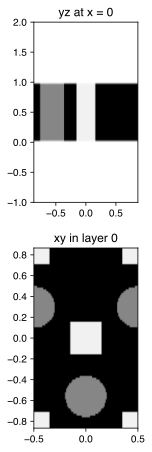

In [14]:
# We can plot an overview of what we've built so far
legume.viz.structure(phc, yz=True, figsize=2., cbar=False)